<h3>
I found this program tutorial via the Data Machina mailing list. It is
    Deep Leaning tutorial using the Keras & Theano packages on the MNIST
    hand-written digits data set. Quite serendipitous, as I was planning
    on working on this data set as my next project! The website is:
    http://elitedatascience.com/keras-tutorial-deep-learning-in-python
    Let's gooooo 
</h3>

In [1]:
# Package imports
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.misc import imread
#This is simply a linear stack of neural network layers, and it's perfect for the type of feed-forward CNN we're building in this tutorial.
from keras.models import Sequential
# These are the layers that are used in almost any neural network:
from keras.layers import Dense, Dropout, Activation, Flatten
#These are the convolutional layers that will help us efficiently train on image data:
from keras.layers import Convolution2D, MaxPooling2D
#helpful utilities
from keras.utils import np_utils

Using Theano backend.


In [2]:
np.random.seed(123) #For reproducability with the tutorial.

In [3]:
import os
root_dir = os.path.abspath('./')
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')

# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)

True

In [4]:
train = pd.read_csv(os.path.join(data_dir, 'Train', 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'Test_AV.csv'))

In [5]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


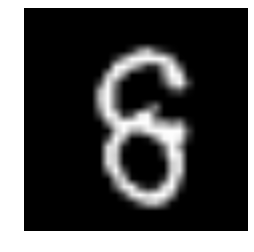

In [6]:
#Using the Analytics Vidhya tutorial for a few inputs to parse the train / test data sets. 
rng = np.random.RandomState(123)
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)

img = imread(filepath, flatten=True)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

Now that we have successfully loaded our data, we can convert all of the images into numpy arrays for use in our model.

In [7]:
train.shape

(49000, 2)

In [28]:
img.shape #Our image can be represented by a 28x28 numpy matrix, specifying pixel data. 

(28, 28)

In [9]:
temp1 = []
for img_name in train.filename:
 image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
 img = imread(image_path, flatten=True)
 img = img.astype('float32')
 temp1.append(img)

train_x = np.stack(temp1)

temp2 = []
for img_name in test.filename:
 image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
 img = imread(image_path, flatten=True)
 img = img.astype('float32')
 temp2.append(img)

test_x= np.stack(temp2)

In [10]:
train_x.shape

(49000, 28, 28)

When using the Theano backend, you must explicitly declare a dimension for the
depth of the input image. For example, a full-color image with all 3 RGB
channels will have a depth of 3. Our MNIST images only have a depth of 1, but
we must explicitly declare that. In other words, we want to transform our
dataset from having shape (n, width, height) to (n, depth, width, height).

In [11]:
train_x = train_x.reshape(train_x.shape[0], 1, 28, 28)
test_x = test_x.reshape(test_x.shape[0], 1, 28, 28)

In [12]:
train_x.shape

(49000, 1, 28, 28)

In [13]:
train_x /= 255
test_x /= 255

In [14]:
train_y = train.label

In [15]:
#At this stage, I need to split the train data into a train set and a cross-validation set. I'm going to use a 75/25
#split, what the hell. The original Keras tutorial I followed had a 60,000 digit training set, as well as a labeled
#test set. Here, my test set is not labeled - aka that's what I am classifying!

In [16]:
split_size = int(train_x.shape[0] * 0.75)

train_x, cross_val_x = train_x[:split_size], train_x[split_size:]
train_y, cross_val_y = train_y[:split_size], train_y[split_size:]

In [17]:
# Next up is to reshape the labels to categorical data, with the quick and easy .to_categorical function
train_Y = np_utils.to_categorical(train_y, 10)
cross_val_Y = np_utils.to_categorical(cross_val_y, 10) #notice we went to capital Y's for this change

In [18]:
train_Y.shape

(36750, 10)

In [19]:
cross_val_Y.shape

(12250, 10)

<h3>
Now, we're ready to jump back to the original tutorial to build, train and evaluate our model. I'm not expecting as great a result (99.1% accuracy) because of the (much) smaller training set. But, that's the data I was given, so I have to work within those confines
</h3>

In [20]:
#Declare a sequential model format
model = Sequential()
#Declare the input layer
model.add(Convolution2D(32,3,3, activation='relu', input_shape=(1,28,28)))
#input shape corresponds to the shape of one sample, depth, width, height
print(model.output_shape) #we get (None,-1,26,32) tutorial shows (None,32,26,26)
#adding layers to our model like building lego
model.add(Convolution2D(32,3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Dropout layer is a method of regularization (prevents over-fitting)
#Now add fully connected Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#Hard part is over - now we need to compile model and define loss function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

(None, 32, 26, 26)


Up next is training the model (cpu intensive due to the 10 epochs!) After that, I need to add some lines to demonstrate the predictions from my trained model. Getting pretty darn close! 

In [29]:
model.fit(train_x, train_Y, batch_size=32, nb_epoch=10, verbose=1)
#Finally, we evaluate this model on the test set, generating a score
score = model.evaluate(cross_val_x, cross_val_Y, verbose=0)

Epoch 1/10
36750/36750 [==============================] - 156s - loss: 0.1060 - acc: 0.9667   
Epoch 2/10
36750/36750 [==============================] - 156s - loss: 0.0788 - acc: 0.9765   
Epoch 3/10
36750/36750 [==============================] - 153s - loss: 0.0666 - acc: 0.9782   
Epoch 4/10
36750/36750 [==============================] - 151s - loss: 0.0579 - acc: 0.9818   
Epoch 5/10
36750/36750 [==============================] - 151s - loss: 0.0493 - acc: 0.9843   
Epoch 6/10
36750/36750 [==============================] - 152s - loss: 0.0435 - acc: 0.9867   
Epoch 7/10
36750/36750 [==============================] - 2292s - loss: 0.0383 - acc: 0.9872  
Epoch 8/10
36750/36750 [==============================] - 155s - loss: 0.0352 - acc: 0.9887   
Epoch 9/10
36750/36750 [==============================] - 152s - loss: 0.0321 - acc: 0.9896   
Epoch 10/10
36750/36750 [==============================] - 155s - loss: 0.0289 - acc: 0.9906   


In [30]:
score

[0.044933588697666504, 0.98865306122448982]

In [31]:
test_x.shape

(21000, 1, 28, 28)

In [32]:
predictions = model.predict_classes(test_x)

21000/21000 [==============================] - 28s    


In [33]:
predictions.shape

(21000,)

In [34]:
predictions[:10]

array([4, 0, 9, 7, 9, 6, 6, 7, 0, 4])

Come on you digits!! I managed to figure out how to create my predictions set. Now I just need to do some housekeeping, and maybe some fun visualization of a sample number or two. Well, I also want to train my model on more than one epoch. It is actually really good with just the one epoch, but it can get much better. Woohoo! The more I grind away at this stuff, the more confident I get. The real quantum leap will be when I get comfortable enough with the material to understand how to apply these tools to models of my own creation. 

Prediction is:  7


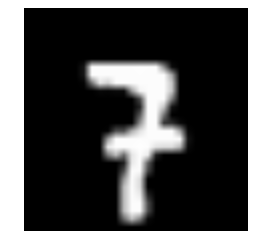

In [35]:
img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - 49000
print ("Prediction is: ", predictions[test_index])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

Satisfied, it's time to create the submission file to put on the Analytics Viddhya site. Let's wrap this up, B.

In [49]:
d = {'filename': test.filename, 'label':predictions}

In [50]:
submit_file = pd.DataFrame(d)

In [51]:
submit_file.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [52]:
submit_file.to_csv('CN_submit', index=False)